In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
ge = pd.read_csv('data/election-data-2004-2018.csv')

In [3]:
ge.sample(5)

,year,state,seat_code_no,seat_code,seat_name,candidate,party,coalition,winlose,is_uncontested,votes,majority,margin,voteshare,total_eligible,total_voted,total_majority,votes_spoilt,race_malay,race_chinese,race_indian,race_others,race_bumi_east_msia,data_errors
257,2004,WP Putrajaya,125,P125,Putrajaya,Datuk Tengku Adnan Tengku Mansor,UMNO,BN,1,0,4086,3546,0.766537,0.883268,5079,4626,3546,28,0.95,0.02,0.03,0.01,0.00,NaN
848,2008,Sabah,187,P187,Kinabatangan,Ahmad Abdul,PKR,Pakatan,0,0,2181,666,-0.518397,0.178727,19554,12203,6326,589,0.00,0.01,0.00,0.00,0.98,NaN
1594,2018,Kelantan,30,P30,Jeli,Cikgu Mat,PAS,PAS,0,0,15018,-6647,-0.171487,0.387451,47470,38761,6647,400,0.98,0.00,0.00,0.01,0.00,NaN
295,2004,Johor,144,P144,Ledang,Hamim Samuri,UMNO,BN,1,0,30967,21671,0.538236,0.769118,57175,40263,21671,1362,0.53,0.43,0.04,0.00,0.00,NaN
1335,2013,Sabah,169,P169,Kota Belud,Lamsil Bin Amidsor,IND,NaN,0,0,979,-20789,-0.120409,0.023137,51467,42314,5095,1109,0.00,0.02,0.00,0.01,0.98,NaN


In [4]:
cols_simple = ['year', 'state', 'seat_code', 'seat_name', 'candidate', 'party', 'coalition', 'winlose']

## Exploration

### No coalition

Peaked in 2013, but no winners outside Sabah/Sarawak.

In [5]:
no_coalition = ge[ge['coalition'].isnull()]
no_coalition.pivot_table(values='candidate', index='year', aggfunc='count')

,candidate
year,
2004,43
2008,50
2013,139
2018,61


In [6]:
no_coalition.pivot_table(values='candidate', index=['year', 'state'], aggfunc='count'
).sort_values(['year', 'candidate'], ascending=[True, False])

candidate
year state                     
2004 Sarawak                 22
     Sabah                   17
     WP Kuala Lumpur          2
     Kelantan                 1
     Selangor                 1
2008 Sabah                   19
     Sarawak                 19
     Kelantan                 2
     Perak                    2
     Selangor                 2
     Johor                    1
     Negeri Sembilan          1
     Penang                   1
     Terengganu               1
     WP Kuala Lumpur          1
     WP Labuan                1
2013 Sabah                   45
     Sarawak                 24
     Selangor                20
     Kedah                    9
     Perak                    8
     Pahang                   7
     WP Kuala Lumpur          7
     Penang                   6
     Negeri Sembilan          5
     Kelantan                 3
     Johor                    2
     Terengganu               2
     Perlis                   1
2018 Sabah                   34
     Sarawak                  7
     Penang                   6
     Selangor                 6
     Perak                    2
     WP Kuala Lumpur          2
     Kedah                    1
     Negeri Sembilan          1
     Pahang                   1
     WP Labuan                1

In [7]:
no_coalition_winners = ge[ge['coalition'].isnull() & ge['winlose'] == 1]
no_coalition_winners.pivot_table(values='candidate', index=['year', 'state'], aggfunc='count')

candidate
year state             
2004 Sabah            1
     Sarawak          4
2008 Sarawak          4
2013 Sarawak          4
2018 Sabah            1

In [8]:
no_coalition_winners[cols_simple]

,year,state,seat_code,seat_name,candidate,party,coalition,winlose
382,2004,Sabah,P186,Sandakan,Chong Hon Min,IND,NaN,1
393,2004,Sarawak,P192,Mas Gading,Tekhee@Tiki Ak Lafe,SPDP,NaN,1
417,2004,Sarawak,P205,Saratok,Jelaing Mersat,SPDP,NaN,1
439,2004,Sarawak,P217,Bintulu,Datuk Seri Tiong King Sing,SPDP,NaN,1
443,2004,Sarawak,P220,Baram,Datuk Jacob Dungau Sagan,SPDP,NaN,1
858,2008,Sarawak,P192,Mas Gading,Datuk Dr Tiki Lafe,SPDP,NaN,1
889,2008,Sarawak,P205,Saratok,Jelaing Mersat,SPDP,NaN,1
912,2008,Sarawak,P217,Bintulu,Datuk Seri Tiong King Sing,SPDP,NaN,1
918,2008,Sarawak,P220,Baram,Datuk Jacob Dungau Sagan,SPDP,NaN,1
1421,2013,Sarawak,P192,Mas Gading,Nogeh Anak Gumbek,SPDP,NaN,1


### Uncontested seats

Only Johor/Sabah/Sarawak 2004/2008.

In [9]:
uncontested = ge[ge['is_uncontested'] == 1]
uncontested.pivot_table(values='candidate', index=['year', 'state'], aggfunc='count')

candidate
year state             
2004 Johor            2
     Sabah            7
     Sarawak          5
2008 Johor            1
     Sabah            2
     Sarawak          6

In [10]:
uncontested[cols_simple]

,year,state,seat_code,seat_name,candidate,party,coalition,winlose
319,2004,Johor,P156,Kota Tinggi,Datuk Syed Hamid Albar,UMNO,BN,1
320,2004,Johor,P157,Pengerang,Datuk Azalina Othman Said,UMNO,BN,1
360,2004,Sabah,P175,Papar,Rosnah Abdul Abdul Rashid Shirlin,UMNO,BN,1
363,2004,Sabah,P177,Beaufort,Azizah Mohd Dun,UMNO,BN,1
364,2004,Sabah,P178,Sipitang,Datuk Dr Yusof Yacob,UMNO,BN,1
376,2004,Sabah,P183,Beluran,Ronald Kiandee,UMNO,BN,1
384,2004,Sabah,P187,Kinabatangan,Bung Mokthar Radin,UMNO,BN,1
391,2004,Sabah,P190,Tawau,Shim Paw Fatt,SAPP,BN,1
392,2004,Sabah,P191,Kalabakan,Abdul Ghapur Salleh,UMNO,BN,1
403,2004,Sarawak,P197,Kota Samarahan,Abdul Taib Mahmud,PBB,BN,1


### Data errors

Only Sabah/Sarawak 2004/2008.

In [11]:
data_errors = ge[~ge['data_errors'].isnull()]
data_errors[list([*cols_simple, 'data_errors'])]

,year,state,seat_code,seat_name,candidate,party,coalition,winlose,data_errors
393,2004,Sarawak,P192,Mas Gading,Tekhee@Tiki Ak Lafe,SPDP,NaN,1,Race data incomplete or unavailable.
394,2004,Sarawak,P192,Mas Gading,Dr Patau Rubis,SNAP,NaN,0,Race data incomplete or unavailable.
395,2004,Sarawak,P193,Santubong,Datuk Wan Junaidi Tuanku Jaafar,PBB,BN,1,Race data incomplete or unavailable.
396,2004,Sarawak,P193,Santubong,Idris Bin Bohari,IND,NaN,0,Race data incomplete or unavailable.
397,2004,Sarawak,P194,Petra Jaya,Fadillah Yusof,PBB,BN,1,Race data incomplete or unavailable.
398,2004,Sarawak,P194,Petra Jaya,Wan Zainal Abidin Wan Senusi,PKR,Pakatan,0,Race data incomplete or unavailable.
403,2004,Sarawak,P197,Kota Samarahan,Abdul Taib Mahmud,PBB,BN,1,Race data incomplete or unavailable.
404,2004,Sarawak,P198,Mambong,Dr James Dawos Mamit,PBB,BN,1,Race data incomplete or unavailable.
405,2004,Sarawak,P198,Mambong,Mangan Ngandok,STAR,NaN,0,Race data incomplete or unavailable.
406,2004,Sarawak,P199,Serian,Richard Riot Jaem,SUPP,BN,1,Race data incomplete or unavailable.


### Extra win in 2008 (UPDATE TO DATAFRAME)

Winner is Bung Moktar Radin, Ricky Jikah's win is mistakenly recorded.

In [12]:
ge.pivot_table(values='winlose', index='year', aggfunc='sum')

,winlose
year,
2004,218
2008,223
2013,222
2018,222


In [13]:
ge[ge['year'] == 2008].pivot_table(values='winlose', index='seat_code', aggfunc='sum'
).sort_values('winlose', ascending=False)[:1]

,winlose
seat_code,
P187,2


In [14]:
ge[(ge['year'] == 2008) & (ge['seat_code'] == 'P187')]

,year,state,seat_code_no,seat_code,seat_name,candidate,party,coalition,winlose,is_uncontested,votes,majority,margin,voteshare,total_eligible,total_voted,total_majority,votes_spoilt,race_malay,race_chinese,race_indian,race_others,race_bumi_east_msia,data_errors
847,2008,Sabah,187,P187,Kinabatangan,Datuk Bung Moktar Radin,UMNO,BN,1,0,8507,6326,0.518397,0.697124,19554,12203,6326,589,0.0,0.01,0.0,0.0,0.98,NaN
848,2008,Sabah,187,P187,Kinabatangan,Ahmad Abdul,PKR,Pakatan,0,0,2181,666,-0.518397,0.178727,19554,12203,6326,589,0.0,0.01,0.0,0.0,0.98,NaN
849,2008,Sabah,187,P187,Kinabatangan,Dasim @ Ricky Jikah,UMNO,BN,1,0,1515,6326,0.518397,0.124150,19554,12203,6326,589,0.0,0.01,0.0,0.0,0.98,NaN


In [15]:
ge.at[849, 'winlose'] = 0

In [16]:
ge.pivot_table(values='winlose', index='year', aggfunc='sum')

,winlose
year,
2004,218
2008,222
2013,222
2018,222


### Y/Y seat changes

In [17]:
ge_2004 = ge[ge['year'] == 2004]
ge_2008 = ge[ge['year'] == 2008]
ge_2013 = ge[ge['year'] == 2013]
ge_2018 = ge[ge['year'] == 2018]

In [18]:
ge_2018_codes = ge_2018['seat_code'].unique()
ge_2018_seats = ge_2018['seat_name'].unique()

In [19]:
for year in ge['year'].unique()[:-1]:
    ge_year = ge[ge['year'] == year]
    ge_year_codes = ge_year['seat_code'].unique()
    ge_year_seats = ge_year['seat_name'].unique()
    
    in_year_only = ge_year_seats[~np.isin(ge_year_seats, ge_2018_seats)]
    in_2018_only = ge_2018_seats[~np.isin(ge_2018_seats, ge_year_seats)]
    
    in_year_codes_only = ge_year_codes[~np.isin(ge_year_codes, ge_2018_codes)]
    in_2018_codes_only = ge_2018_codes[~np.isin(ge_2018_codes, ge_year_codes)]
    
    print(f'''{year}
{len(in_year_only)} seats in {year} that did not exist in 2018:
{', '.join(in_year_only)}
{len(in_year_codes_only)} codes in {year} that did not exist in 2018:
{', '.join(in_year_codes_only)}
{len(in_2018_only)} seats in 2018 that did not exist in {year}:
{', '.join(in_2018_only)}
{len(in_2018_codes_only)} codes in 2018 that did not exist in {year}:
{', '.join(in_2018_codes_only)}
''')

2004
15 seats in 2004 that did not exist in 2018:
Kulim Bandar Baharu, Kota Bahru, Grik, Bagan Datok, Telok Intan, Ulu Selangor, Serdang, Kelana Jaya, PJ Selatan, PJ Utara, Teluk Kemang, Bukit Katil, Gelang Patah, Mambong, Kuala Rajang
0 codes in 2004 that did not exist in 2018:

19 seats in 2018 that did not exist in 2004:
Kulim-Bandar Baharu, Kota Bharu, Gerik, Bagan Datuk, Teluk Intan, Hulu Selangor, Bangi, Petaling Jaya , Damansara, Sungai Buloh, Port Dickson, Hang Tuah Jaya, Iskandar Puteri, Puncak Borneo, Tanjong Manis, Igan, Sibuti, Limbang, Lawas
4 codes in 2018 that did not exist in 2004:
P207, P218, P221, P222

2008
15 seats in 2008 that did not exist in 2018:
Kulim Bandar Baharu, Kota Bahru, Grik, Bagan Datok, Telok Intan, Ulu Selangor, Serdang, Kelana Jaya, PJ Selatan, PJ Utara, Teluk Kemang, Bukit Katil, Gelang Patah, Mambong, Kuala Rajang
0 codes in 2008 that did not exist in 2018:

15 seats in 2018 that did not exist in 2008:
Kulim-Bandar Baharu, Kota Bharu, Gerik, Bagan

## Plots

### Number of candidates by year (UPDATE TO DATAFRAME)

Number of unaffiliated candidates exploded in 2013.

What about the PAS candidates? How many were really new?

In [20]:
ge['coalition'].fillna('None', inplace=True)

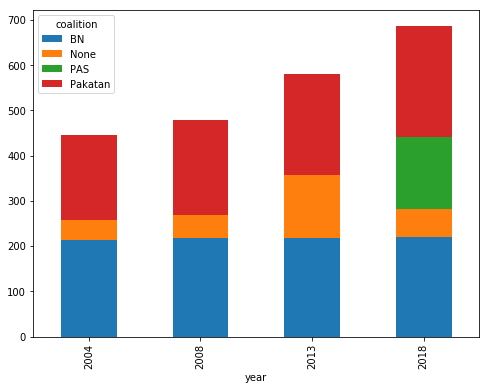

In [21]:
_ = ge.groupby(['year', 'coalition'])['candidate'].count().unstack().plot.bar(stacked=True, figsize=(8, 6))

### Number of  parties by year

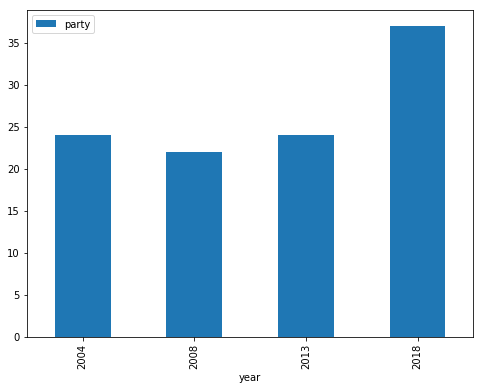

In [22]:
_ = pd.DataFrame(ge.groupby('year')['party'].nunique()).plot.bar(figsize=(8, 6))

In [23]:
for year in ge['year'].unique():
    parties_in_year = ge[ge['year'] == year]['party'].unique()
    print('Parties in {}:\n{}\n'.format(year, ', '.join(parties_in_year)))

Parties in 2004:
UMNO, PAS, MCA, PKR, Ind, DAP, GERAKAN, PPP, MIC, MDP, IND, PBS, SETIA, UPKO, SAPP, PBRS, LDP, PASOK, SPDP, SNAP, PBB, SUPP, STAR, PBDS

Parties in 2008:
UMNO, PAS, PKR, MCA, IND, DAP, GERAKAN, PPP, MIC, PRM, PBS, BERSEKUTU, UPKO, SAPP, PASOK, PBRS, LDP, SPDP, SNAP, PBB, SUPP, PRS

Parties in 2013:
PAS, UMNO, IND, PKR, MCA, BERJASA, BERSAMA, KITA, DAP, PCM, MIC, GERAKAN, PPP, SAPP, STAR, PBS, UPKO, PBRS, LDP, SPDP, PBB, SUPP, PRS, SWP

Parties in 2018:
UMNO, BERSATU, PAS, PKR, AMANAH, MCA, BEBAS, PRM, DAP, PCM, MU, GERAKAN, PFP, MIC, PSM, BERJASA, IKATAN, MYPPP, PAP, WARISAN, HR, PPRS, PBS, PCS, UPKO, SAPP, ANAKNEGERI, STAR, PBRS, LDP, PDP, PBB, SUPP, PRS, PBDSB, PBK, PEACE



### Voter turnout by year

In [24]:
ge_seats = ge[['year', 'state', 'seat_code_no', 'seat_code', 'seat_name', 'total_eligible', 'total_voted', 'votes_spoilt']]
ge_seats = ge_seats.drop_duplicates()

In [25]:
ge_seats.sample(5)

,year,state,seat_code_no,seat_code,seat_name,total_eligible,total_voted,votes_spoilt
185,2004,Pahang,91,P91,Rompin,38319,29368,847
104,2004,Penang,52,P52,Bayan Baru,55407,40009,1010
1154,2013,Selangor,97,P97,Selayang,105895,90880,1435
181,2004,Pahang,89,P89,Bentong,52665,37449,1000
1854,2018,Selangor,112,P112,Kuala Langat,102406,88097,1131


In [26]:
ge_seats['year'].value_counts()

2018    222
2013    222
2008    222
2004    218
Name: year, dtype: int64

In [27]:
ge_vote_agg = pd.DataFrame(ge_seats.pivot_table(values=['total_eligible', 'total_voted', 'votes_spoilt'], index='year', aggfunc='sum'))
# ge_vote_agg.columns = ['_'.join(col).strip() for col in ge_vote_agg.columns.values]
ge_vote_agg.columns = ['total_eligible', 'total_voted', 'total_spoilt']
ge_vote_agg['total_voted_inc_spoilt'] = ge_vote_agg['total_voted'] + ge_vote_agg['total_spoilt']
ge_vote_agg['turnout'] = ge_vote_agg['total_voted'] / ge_vote_agg['total_eligible']
ge_vote_agg['turnout_inc_spoilt'] = ge_vote_agg['total_voted_inc_spoilt'] / ge_vote_agg['total_eligible']

In [28]:
ge_vote_agg

,total_eligible,total_voted,total_spoilt,total_voted_inc_spoilt,turnout,turnout_inc_spoilt
year,,,,,,
2004,10236167,6975942,149936,7125878,0.681499,0.696147
2008,10921301,7946693,175011,8121704,0.727632,0.743657
2013,13268002,11076761,171556,11248317,0.834848,0.847778
2018,14940624,12082431,161474,12243905,0.808697,0.819504


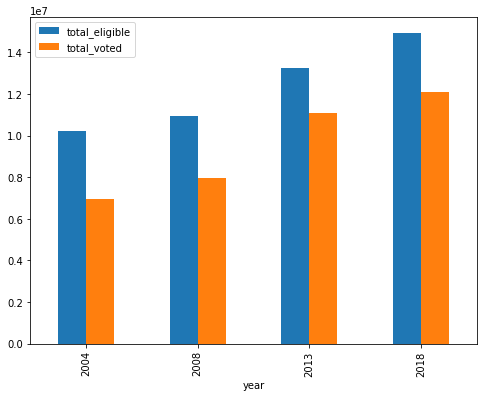

In [29]:
_ = ge_vote_agg[['total_eligible', 'total_voted']].plot.bar(figsize=(8, 6))

### Average candidates per seat by year

In [30]:
candidates_per_seat = ge.pivot_table(values='candidate', index=['year', 'seat_code'], aggfunc='count')
candidates_per_seat.sample(3)

,,candidate
year,seat_code,
2018,P128,3
2004,P162,2
2013,P202,4


In [31]:
avg_candidates_per_seat = candidates_per_seat.pivot_table(values='candidate', index='year', aggfunc=['mean', 'min', 'max'])
avg_candidates_per_seat

,mean,min,max
,candidate,candidate,candidate
year,,,
2004,2.041284,1,4
2008,2.153153,1,5
2013,2.612613,2,7
2018,3.094595,2,6


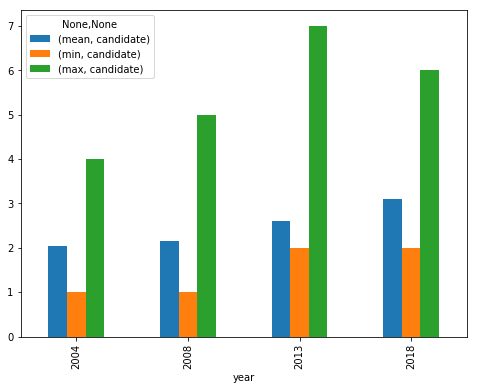

In [32]:
_ = avg_candidates_per_seat.plot.bar(figsize=(8, 6))

### Coalition win percentage by year

In [33]:
coalition_winloss = ge.pivot_table(values='candidate', index=['year', 'coalition', 'winlose'], aggfunc='count').unstack()
coalition_winloss

candidate     
winlose                0    1
year coalition               
2004 BN               21  193
     None             38    5
     Pakatan         168   20
2008 BN               83  136
     None             46    4
     Pakatan         127   82
2013 BN               89  129
     None            135    4
     Pakatan         134   89
2018 BN              142   79
     None             60    1
     PAS             142   18
     Pakatan         121  124

In [34]:
coalition_winloss.columns = ['lost', 'won']
coalition_winloss['total'] = coalition_winloss['lost'] + coalition_winloss['won']
coalition_winloss['percentage'] = coalition_winloss['won'] / coalition_winloss ['total']

In [35]:
coalition_winloss

lost  won  total  percentage
year coalition                              
2004 BN           21  193    214    0.901869
     None         38    5     43    0.116279
     Pakatan     168   20    188    0.106383
2008 BN           83  136    219    0.621005
     None         46    4     50    0.080000
     Pakatan     127   82    209    0.392344
2013 BN           89  129    218    0.591743
     None        135    4    139    0.028777
     Pakatan     134   89    223    0.399103
2018 BN          142   79    221    0.357466
     None         60    1     61    0.016393
     PAS         142   18    160    0.112500
     Pakatan     121  124    245    0.506122

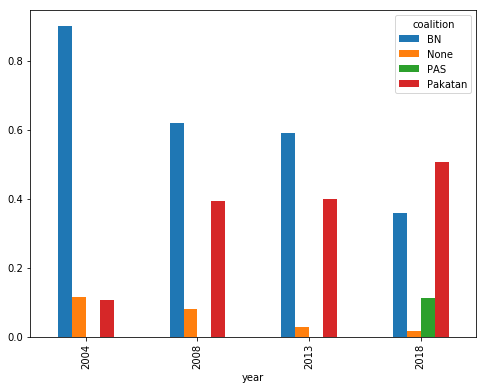

In [36]:
_ = coalition_winloss['percentage'].unstack().plot.bar(figsize=(8, 6))

## Map generators

In [37]:
ge14_geo = gpd.read_file('data/parliamentary-boundaries-2018-working.geojson')

In [38]:
ge14_geo['KodPAR'] = pd.to_numeric(ge14_geo['KodPAR'])

In [39]:
ge14_geo.sample(5)

,KodPAR,Parliament,State,geometry
4,57,PARIT BUNTAR,PERAK,(POLYGON ((100.4127561987131 4.992960828699954...
5,62,SUNGAI SIPUT,PERAK,(POLYGON ((101.4472163357217 5.012500139804442...
16,71,GOPENG,PERAK,"(POLYGON ((101.045713542819 4.458818071545341,..."
21,74,LUMUT,PERAK,"(POLYGON ((100.546460378619 4.189490922811594,..."
33,51,BUKIT GELUGOR,PULAU PINANG,"(POLYGON ((100.277055002658 5.330154388719554,..."


In [40]:
years = ge['year'].unique()
coals = ge['coalition'].unique()

In [41]:
for year in years:
    ge_year = ge[ge['year'] == year]
    ge_year_won_seats = ge_year[ge_year['winlose'] == 1]
    for coal in coals:
        ge_year_coal_seats = ge_year_won_seats[ge_year_won_seats['coalition'] == coal]
        ge_year_coal_geo = ge14_geo[ge14_geo['KodPAR'].isin(ge_year_coal_seats['seat_code_no'])]
        with open(f'data/ge-{str(year)}-{coal.lower()}-geo.geojson', 'w') as f:
            f.write(ge_year_coal_geo.to_json())